# Overview and Abstract
- Team name: Help
- Group Number: Z
- Word count: 1,159
- Class: CS987

- Team members: Abdulla Hamideh(2020677920), Jan Welz(202073187), Jonathan Miller(202051047), Konstantin Stauffer(202067955), Sotiris Hadjinicolaou(202092702).

- Task 1

- Executive summary
Task: This report aimed to solve a binary classification problem using a standard machine learning and neural network models that would predict whether the interaction with a document leads to it being classified as relevant(1) or not relevant(0).

Models employed in the analysis include logistic regression, 3-layer, dense-deep and wide and deep neural networks. Class weights and data augmentation was performed to solve the data imbalance of the target variable. The best performing model was the 3-layer model with an Adam optimizer, a learning rate schedule and an early stopping regularization technique with an f1 score of 0.13149 on Kaggle.


# Method
The same data preprocessing was performed both in the training set and test set. Variables id, user, session, and query were dropped from both datasets as those variables seem to not add valuable information for the task. The variable timestamp was also dropped as hour, day and month provide the same information. The final training set includes 3 binary variables (new-sub, premium-pack and psrel), 5 numerical variables (rank, serp, hour, dwell and #cpv45) and 7 categorical variables  (search, day, month, source, type, nature and cpvs). The preprocessing was divided into categorical and numerical variables.
All numerical variables were analyzed using boxplots. Outliers lying above the upper whisker were given the value of the upper bound and vice-versa. 
Categorical variables were transformed using the Label Encoder function. Label encoding is a very common approach giving a value from 1 up to the total value of categories found in the feature transformed. The variable nature contained 11,402 missing values in the training set and 719 missing values in the test set. Instead of deleting the missing values and losing important information, a new category named 'none' was created to hold all missing values. All the features were scaled using the StandardScaler function as it transforms all values to a range between -1 and 1 with a mean of 0.

## Logistic Regression
Logistic regression is one of the commonly used models for binary classification. Essentially,  it estimates the probability that a data point belongs to a particular class.

## Neural network models
All models use Adam optimizer, learning rate of 0.001, cross entropy loss function and a batch size of 32.  Adam optimizer is considered a very robust choice of the optimizer that works for most deep learning problems and can be very efficient in terms of computation as it does not require the system to have a lot of memory (Kingma and Ba, 2015).

###3-layer Neural Network

• Input layer

• 1 hidden dense layer with 125 neurons, RELU activation function and He normal initialization.

• Output layer with sigmoid activation function.

• Epochs = 100.

RELU is defined as y= max (0,z)  and has been used as it can speed up the model's training and since the function is not limited to very high numbers of z, it can help alleviate vanishing gradient problems noticed in other activation functions (Geron, 2019). Using RELU, He et al (2015) argues that the most suitable initialization to choose is He as it speeds up the learning. 

### Dense deep neural network

• Input layer

• 3 hidden dense layers with 125 neurons on each layer, RELU as activation function and He initialization.

• 3 dropout layers(one after each dense hidden layer) with dropout rate of 0.2

• Output layer with a sigmoid activation function.

• Epochs = 30.

Dropout is one of the most widely used regularization approaches that can help models increase their accuracy by a couple of points and reduce overfitting (Srivastava et al, 2014; Hinton, 2012). According to the specified dropout rate, some neurons are dropped during training, and so, neurons left in the model are 'learning' to be more productive on their own.

### Wide and Deep model

This model creates two paths for the inputs (one deep path and one wide path) and then concatenating them to be feed in the output layer so, it can learn deeper patterns as information passed through the deep path with hidden dense layers and can also learn simpler transformations through the wide path. 

• Input layer

• 3 hidden dense layers of 50 neurons each, RELU as activation function and He initialization used for the deep path. 

• Concatenating layer uniting the output form the deep and wide path. 

• Output layer with a sigmoid activation function.

• Epochs = 3.

## Training Schedule

• Trial-and-error approach to different combinations of neurons, activation functions and other parameters. 

• Grid search function was employed in the dense deep model to get a feeling of the appropriate number of neurons and hidden layers to be used as specified in the parameter grid. However, this method was found to be very time consuming (30 minutes) to run.

## Improving the performance

• Non-relevant documents(0) 94.05% 

• Relevant documents(1) 5.95% 

This creates a problem as the models will be heavily biased towards the majority class when trained. Therefore, we introduced class weights that were passed as a parameter through the models. We also used a data augmentation approach like SMOTE oversampling which creates synthetic data values for the minority class so that there are more instances of the minority class. Both methods worked very well in comparison to not using any method to tackle the imbalance problem. Furthermore, we introduced an exponential learning schedule decreasing the learning rate as the model runs over more epochs. We also introduced a regularization technique called early stopping, stopping the training when the validation loss finds its minimum.


# Packages

In [ ]:
import os
import time
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

!pip install scikit-learn==0.21.2
import sklearn

import tensorflow as tf
from tensorflow import keras
from keras.callbacks import Callback
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
sklearn.__version__
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
import imblearn
print(imblearn.__version__)
from imblearn.over_sampling import SMOTE
from collections import Counter
import io
from google.colab import files
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,classification_report
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

import keras
import keras.utils
from keras import utils as np_utils
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

     |████████████████████████████████| 6.7MB 6.8MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
0.4.3


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


# Result table

• Best f1 score on the training data was recorded in the dense deep model with class weights.

• Worst f1 score on training data was recorded with the logistic regression with class weights and with SMOTE. 

The result of the logistic regression was quite expected as neural network models are considered more powerful models. The best prediction on Kaggle of 0.13149 was performed using the 3-layer neural network model with class weights. All models` scores are presented in the table x. Overall, the scores for all the models were low as a reasonable f1 score is above 0.75.
Overfitting means that the models are not generalizing well on unseen data. We first included some batch normalization layers after each hidden dense layers to tackle overfitting, but the training loss was higher, so those layers were removed. We also tried l2 regularization for each hidden dense layers of the models but, they did not alleviate overfitting. Regularization makes the network prefer smaller weights, as, with a non-regularized cost function, weights can get quite large. Lastly, as mentioned above, we used some dropout layers to all neural network models. Still, it was only beneficial in terms of higher scores on the test data for the dense deep model and not eliminating overfitting.


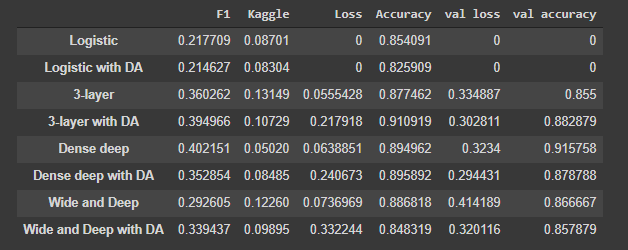

# Recommendations and discussion

As shown from our results, adding more complexity (more layers or more parameters) to the models did not increase the overall score. In general, we cannot recommend any of the models to be used yet as the f1-score is significantly to low to add value for the company through the analysis performed. 
More data needs to be collected to solve the issue of imbalanced data and increase the scores to a level where the models can be helpful. As mentioned, we introduced an augmentation technique to increase the data points of the minority class but, it did not give us a better score since synthetic values may add some unwelcome noise to the data, affecting the performance of neural networks. 
Another approach suitable for this task could be reinforcement learning, which should be tried in comparison. 


# References

•	Bengio, Yoshua and Glorot, Xavier.(2010). Understanding the difficulty of training deep feedforward neural networks. In Proceedings of AISTATS 2010, volume 9, pp. 249–256.

•	Cheng, H., Koc, L., Harmsen, J., Shaked, T., Chandra, T., Aradhye, H., Anderson, G., Corrado, G., Chai, W., Ispir, M., Anil, R., Haque, Z., Hong, L., Jain, V., Liu, X. and Shah, H., (2016). Wide & Deep Learning for Recommender Systems. Proceedings of the 1st Workshop on Deep Learning for Recommender Systems,.

•	Géron, A. (2019). Hands-on machine learning with Scikit-Learn, Keras and TensorFlow.

•	He, K., Zhang, X., Ren, S. and Sun, J., 2015. Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification.( 2015) IEEE International Conference on Computer Vision (ICCV),.

•	Hinton, G.E., Srivastave, N., Krizhevsky, A., Sutskever, I., Salakhutdinov, R.R.:(2012). Improving neural networks by preventing co-adaptation of feature detectors. In: arXiv:1207.0580.

•	Khalilpour Darzi, M., Niaki, S. and Khedmati, M.,( 2019). Binary classification of imbalanced datasets: The case of CoIL challenge 2000. Expert Systems with Applications, 128, pp.169-186.

•	Kingma,D.,P., Ba,L.,J, (2015) Adam : A Method for Stochastic Optimization, published as a conference paper at ICLR 2015.

•	Srivastava, Nitish, Hinton, Geoffrey, Krizhevsky, Alex, Sutskever, Ilya, and Salakhutdinov, Ruslan. (2014). Dropout: A simple way to prevent neural networks from overfitting. J. Mach. Learn. Res., 15(1):1929–1958.


# Code

# Loading the training and test set

In [ ]:
# loading the training and test set
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


# Preprocessing

In [ ]:
test = pd.read_csv(io.BytesIO(uploaded['test.csv']))
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# first 5 rows of the training set
train.head()

,user,session,query,timestamp,search,rank,serp,hour,day,month,dwell,new-sub,premium-pack,psrel,source,type,nature,cpvs,#cpv45
0,8438057,A311E564F0A79803FB564CEAB6D7499A,d4fe169251f77f0800245e2df8376856,2020-05-26 10:45:36,quick,1,1,10,Tue,May,1,1,0,0,Intercon,notice,services,"['66131100', '66141000', '66519600', '66520000']",1
1,8438876,5E91CF19B8BEBA58A90E54EC97AAB3AF,5066bca0a00273cf3925b0c2f260f763,2020-01-21 10:47:51,saved,75,8,10,Tue,Jan,10,1,0,0,Contrax Weekly,notice,services,"['79421000', '92520000', '92521000']",2
2,922102585,7D717BA805FB42D51D6C8EC15C0DE2C1,174e0e6c62fd5d7b044dd05b47ce79c9,2020-02-05 09:37:42,advanced,4,1,9,Wed,Feb,21,1,0,0,Contrax Weekly,notice,services,"['79421000', '92520000', '92521000']",2
3,2105483652,D4855E55686DB80328B141598E3174CE,0f9f7f67dc569a6e3dba1ef35ce8970a,2020-01-21 14:43:57,advanced,66,4,14,Tue,Jan,21,0,0,0,Contrax Weekly,notice,services,"['79421000', '92520000', '92521000']",2
4,8438876,5E91CF19B8BEBA58A90E54EC97AAB3AF,5066bca0a00273cf3925b0c2f260f763,2020-01-21 10:48:33,saved,81,9,10,Tue,Jan,20,1,0,0,Contrax Weekly,notice,services,"['72000000', '72263000', '72300000']",1


In [ ]:
# first 5 rows of the test set
test.head()

,user,session,query,timestamp,search,rank,serp,hour,day,month,dwell,new-sub,premium-pack,source,type,nature,cpvs,#cpv45,Id
0,2096178939,3C5FDDE0DBC2E5E812A8DFFAB3491DAA,c71cdfc115f151060c9671fc816cff25,2020-01-21 12:34:56,advanced,2,1,12,Tue,Jan,122,0,0,Contrax Weekly,notice,services,['73110000'],1,0
1,2096178939,B9D21C26929EF384ABBB6B544FB38858,c71cdfc115f151060c9671fc816cff25,2020-01-21 17:33:56,advanced,8,1,17,Tue,Jan,8,0,0,Project,award,services,['79311000'],1,1
2,2096178939,B9D21C26929EF384ABBB6B544FB38858,c71cdfc115f151060c9671fc816cff25,2020-01-21 17:34:04,advanced,7,1,17,Tue,Jan,26,0,0,PCS,notice,services,['73110000'],1,2
3,2096178939,B9D21C26929EF384ABBB6B544FB38858,c71cdfc115f151060c9671fc816cff25,2020-01-21 17:34:36,advanced,3,1,17,Tue,Jan,6,0,0,Contrax Weekly,notice,services,"['73110000', '85100000']",2,3
4,2096178939,71182AF6B9BCB557CFA9402F6CD97361,c5b7b023e9c78c403d621025a715a95c,2020-01-22 09:34:49,advanced,1,1,9,Wed,Jan,1531,0,0,Contracts Finder,award,services,['79310000'],1,4


In [ ]:
print('***** Training set ******')
print('*************************')
train.info()
print('***** Test set ******')
print('*************************')
test.info()

***** Training set ******
*************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user          33000 non-null  int64 
 1   session       33000 non-null  object
 2   query         33000 non-null  object
 3   timestamp     33000 non-null  object
 4   search        33000 non-null  object
 5   rank          33000 non-null  int64 
 6   serp          33000 non-null  int64 
 7   hour          33000 non-null  int64 
 8   day           33000 non-null  object
 9   month         33000 non-null  object
 10  dwell         33000 non-null  int64 
 11  new-sub       33000 non-null  int64 
 12  premium-pack  33000 non-null  int64 
 13  psrel         33000 non-null  int64 
 14  source        33000 non-null  object
 15  type          33000 non-null  object
 16  nature        21598 non-null  object
 17  cpvs          33000 non-null  object

In [ ]:
# dropping uneccesary columns
test1 = test.drop(['Id','user','session','query','timestamp'] ,axis=1)
train = train.drop(['user','session','query','timestamp'] ,axis=1)

##Train data

## Numerical variables





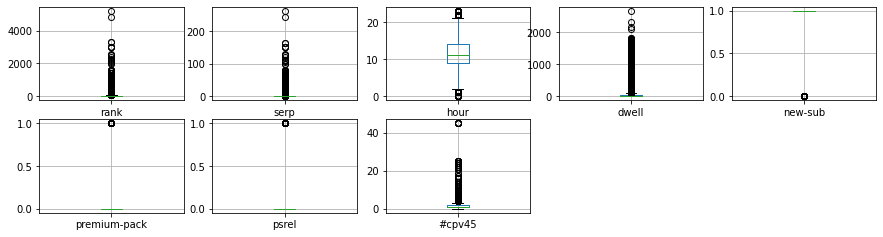

In [ ]:
# Boxplots of Numeric variables
train.plot(kind='box', subplots=True, layout=(5,5), grid='True', figsize=(15, 10))
plt.show()

In [ ]:
train.describe() # distribution of numeric variables

,rank,serp,hour,dwell,new-sub,premium-pack,psrel,#cpv45
count,33000.000000,33000.000000,33000.000000,33000.000000,33000.000000,33000.000000,33000.000000,33000.000000
mean,33.001697,2.125667,11.576848,73.164091,0.796818,0.189970,0.059455,1.597727
std,106.874572,5.116320,3.360440,197.610658,0.402373,0.392283,0.236477,1.547953
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,9.000000,3.000000,1.000000,0.000000,0.000000,1.000000
50%,7.000000,1.000000,11.000000,11.000000,1.000000,0.000000,0.000000,1.000000
75%,25.000000,1.000000,14.000000,42.000000,1.000000,0.000000,0.000000,2.000000
max,5224.000000,262.000000,23.000000,2678.000000,1.000000,1.000000,1.000000,45.000000


In [ ]:
# removing outliers from rank
IQR=train['rank'].quantile(0.75)-train['rank'].quantile(0.25) 

lower_band=train['rank'].quantile(0.25)-(IQR*3)
upper_band=train['rank'].quantile(0.75)+(IQR*3)
print(lower_band), print(upper_band)

-67.0
94.0


(None, None)

In [ ]:
train.loc[train['rank']>=94,'rank']=94 

In [ ]:
# removing outliers from serp
IQR=train['serp'].quantile(0.75)-train['serp'].quantile(0.25) 

lower_band=train['serp'].quantile(0.25)-(IQR*3)
upper_band=train['serp'].quantile(0.75)+(IQR*3)
print(lower_band), print(upper_band)

1.0
1.0


(None, None)

In [ ]:
train.loc[train['serp']>=1,'serp']=1

In [ ]:
# removing outliers from dwell
IQR=train['dwell'].quantile(0.75)-train['dwell'].quantile(0.25) 

lower_band=train['dwell'].quantile(0.25)-(IQR*3)
upper_band=train['dwell'].quantile(0.75)+(IQR*3)
print(lower_band), print(upper_band)

-114.0
159.0


(None, None)

In [ ]:
train.loc[train['dwell']>=159,'dwell']=159 #replacing outliers 

In [ ]:
# removing outliers from #cpv45
IQR=train['#cpv45'].quantile(0.75)-train['#cpv45'].quantile(0.25) 

lower_band=train['#cpv45'].quantile(0.25)-(IQR*3)
upper_band=train['#cpv45'].quantile(0.75)+(IQR*3)
print(lower_band), print(upper_band)

-2.0
5.0


(None, None)

In [ ]:
train.loc[train['#cpv45']>=5,'#cpv45']=5

## Categorical variables

In [ ]:
categorical_features=[feature for feature in train.columns if train[feature].dtypes=='O']
categorical_features

['search', 'day', 'month', 'source', 'type', 'nature', 'cpvs']

In [ ]:
train = train.fillna({"nature": "none"}) # create a new category for the missing values so everything nan will go to category none
test1 = test1.fillna({"nature": "none"})

In [ ]:
labelencoder = LabelEncoder()
# encoding categorical values
train['search'] = labelencoder.fit_transform(train['search'])
train['day'] = labelencoder.fit_transform(train['day'])
train['month'] = labelencoder.fit_transform(train['month'])
train['source'] = labelencoder.fit_transform(train['source'])
train['type'] = labelencoder.fit_transform(train['type'])
train['nature'] = labelencoder.fit_transform(train['nature'])
train['cpvs'] = labelencoder.fit_transform(train['cpvs'])
train


,search,rank,serp,hour,day,month,dwell,new-sub,premium-pack,psrel,source,type,nature,cpvs,#cpv45
0,2,1,1,10,5,5,1,1,0,0,7,2,1,6540,1
1,3,75,1,10,5,2,10,1,0,0,1,2,1,8590,2
2,0,4,1,9,6,1,21,1,0,0,1,2,1,8590,2
3,0,66,1,14,5,2,21,0,0,0,1,2,1,8590,2
4,3,81,1,10,5,2,20,1,0,0,1,2,1,7540,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32995,2,42,1,10,1,3,52,1,0,0,6,2,0,3790,1
32996,2,43,1,10,1,3,15,1,0,0,6,2,0,4845,1
32997,2,45,1,10,1,3,159,1,0,0,6,2,0,3158,2
32998,2,46,1,10,1,3,11,1,0,0,6,2,0,3879,2


## Test data

## Numerical variables

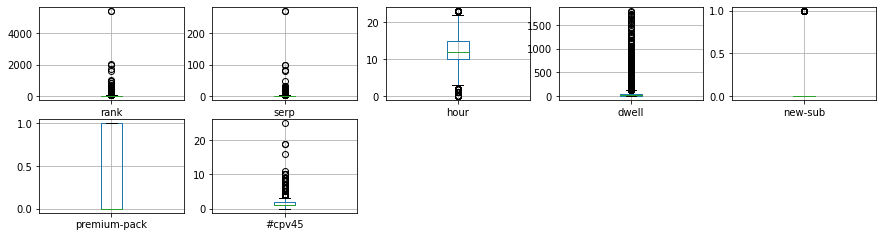

In [ ]:
# Boxplots of Numeric variables
test1.plot(kind='box', subplots=True, layout=(5,5), grid='True', figsize=(15, 10))
plt.show()

In [ ]:
test1.describe() # distribution of numeric variables

,rank,serp,hour,dwell,new-sub,premium-pack,#cpv45
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,36.195400,2.295600,12.221000,71.557400,0.085400,0.482200,1.399600
std,137.447446,6.631517,3.669667,176.795176,0.279504,0.499733,1.121147
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,10.000000,6.000000,0.000000,0.000000,1.000000
50%,10.000000,1.000000,12.000000,19.000000,0.000000,0.000000,1.000000
75%,30.000000,2.000000,15.000000,53.000000,0.000000,1.000000,2.000000
max,5405.000000,271.000000,23.000000,1805.000000,1.000000,1.000000,25.000000


In [ ]:
# removing outliers from rank
IQR=test1['rank'].quantile(0.75)-test1['rank'].quantile(0.25) 

lower_band=test1['rank'].quantile(0.25)-(IQR*3)
upper_band=test1['rank'].quantile(0.75)+(IQR*3)
print(lower_band), print(upper_band)

-78.0
111.0


(None, None)

In [ ]:
test1.loc[test1['rank']>=111,'rank']=111  

In [ ]:
# removing outliers from serp
IQR=test1['serp'].quantile(0.75)-test1['serp'].quantile(0.25) 

lower_band=test1['serp'].quantile(0.25)-(IQR*3)
upper_band=test1['serp'].quantile(0.75)+(IQR*3)
print(lower_band), print(upper_band)

-2.0
5.0


(None, None)

In [ ]:
test1.loc[test1['serp']>=5,'serp']=5 

In [ ]:
# removing outliers from dwell
IQR=test1['dwell'].quantile(0.75)-test1['serp'].quantile(0.25) 

lower_band=test1['dwell'].quantile(0.25)-(IQR*3)
upper_band=test1['dwell'].quantile(0.75)+(IQR*3)
print(lower_band), print(upper_band)

-150.0
209.0


(None, None)

In [ ]:
test1.loc[test1['dwell']>=209,'dwell']=209 

In [ ]:
# removing outliers from #cpv45
IQR=test1['#cpv45'].quantile(0.75)-test1['serp'].quantile(0.25) 

lower_band=test1['#cpv45'].quantile(0.25)-(IQR*3)
upper_band=test1['#cpv45'].quantile(0.75)+(IQR*3)
print(lower_band), print(upper_band)

-2.0
5.0


(None, None)

In [ ]:
test1.loc[test['#cpv45']>=5,'#cpv45']=5 

## Categorical variables

In [ ]:
# Encoding categorical values
test1['search'] = labelencoder.fit_transform(test1['search'])
test1['day'] = labelencoder.fit_transform(test1['day'])
test1['month'] = labelencoder.fit_transform(test1['month'])
test1['source'] = labelencoder.fit_transform(test1['source'])
test1['type'] = labelencoder.fit_transform(test1['type'])
test1['nature'] = labelencoder.fit_transform(test1['nature'])
test1['cpvs'] = labelencoder.fit_transform(test1['cpvs'])
test1

,search,rank,serp,hour,day,month,dwell,new-sub,premium-pack,source,type,nature,cpvs,#cpv45
0,0,2,1,12,5,2,122,0,0,1,2,1,2111,1
1,0,8,1,17,5,2,8,0,0,10,1,1,2249,1
2,0,7,1,17,5,2,26,0,0,9,2,1,2111,1
3,0,3,1,17,5,2,6,0,0,1,2,1,2110,2
4,0,1,1,9,6,2,209,0,0,0,1,1,2240,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,23,2,22,5,3,1,0,1,11,2,2,377,2
4996,3,27,2,7,0,3,43,0,1,6,2,0,1117,1
4997,2,18,1,10,4,3,201,0,0,5,2,0,2586,0
4998,2,21,2,10,4,3,34,0,0,7,1,1,2376,1


# Scaling the training data

In [ ]:
Y = train['psrel'].values # defining the target variable
X = train.drop(['psrel'], axis = 1).values

In [ ]:
# standardizing our data
std_scaler = StandardScaler()
X_scaled_standard = std_scaler.fit_transform(X)
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled_standard, Y, test_size= 0.2, stratify=Y,random_state = 0) 

In [ ]:
print(X_train.shape) # shape of the X_train

(26400, 14)


In [ ]:
#percentage of 0(psrel)
psrel_0 = round(len(train.loc[train.psrel == 0])/len(train.loc[: , "psrel"
])*100,2)
print("The percentage of class 0 in the dataset {0}%".format( psrel_0))
#percentage of 1(psrel)
psrel_1 = round(len(train.loc[train.psrel == 1])/len(train.loc[: , "psrel"
])*100,2)
print("The percentage of class 1 in the dataset {0}%".format( psrel_1))

The percentage of class 0 in the dataset 94.05%
The percentage of class 1 in the dataset 5.95%


# Data augmentation with smote

In [ ]:
oversample = SMOTE(sampling_strategy= 0.6,random_state=0)  #first oversample the minority class to have 70 percent the number of examples of the majority class , the idea of not putting it to 1 is keep that 0z are more than 1, we dont want to make them equal so not to have many synthetic values in.
X_train_DA, y_train_DA = oversample.fit_resample(X_train, y_train)
# summarize the new class distribution
counter1 = Counter(y_train)
counter2 = Counter(y_train_DA)
print('Class Distribution:',counter1)
print('New class Distribution:',counter2)

Class Distribution: Counter({0: 24830, 1: 1570})
New class Distribution: Counter({0: 24830, 1: 14898})


# Adjusting the class weights


In [ ]:
count_0, count_1 = np.bincount(train.psrel)
total_count = len(train.psrel)
weight_0 = (count_0 / total_count)
weight_1 = (count_1 / total_count)
class_weights1 = {0: weight_1, 1: weight_0}

In [ ]:
class_weights1

{0: 0.059454545454545454, 1: 0.9405454545454546}

In [ ]:
class_weights = {0: 0.10, 1: 0.90} # adjusting manually the weights to give the a better score

# Standard Machine Learning Algorithm

In [ ]:
# defining the logistic model
log_clf = LogisticRegression(class_weight=class_weights)
log_clf_DA = LogisticRegression()

# fitting the training set
log_clf.fit(X_train, y_train)
log_clf_DA.fit(X_train_DA, y_train_DA)

# predicting on the validation set
pred = log_clf.predict(X_valid)
pred_DA = log_clf_DA.predict(X_valid)

# Performance metrics
print('The accuracy is :',accuracy_score(y_valid, pred))
print('The f1 score is :',f1_score(y_valid, pred))
print('The confusion matrix:',confusion_matrix(y_valid,pred))   
print('*********************************************************')

print('The accuracy with DA is :',accuracy_score(y_valid, pred_DA))
print('The f1 score with DA is :',f1_score(y_valid, pred_DA))
print('The confusion matrix with DA:',confusion_matrix(y_valid,pred_DA))
print('*********************************************************')  


The accuracy is : 0.8540909090909091
The f1 score is : 0.2177091795288383
The confusion matrix: [[5503  705]
 [ 258  134]]
*********************************************************
The accuracy with DA is : 0.8259090909090909
The f1 score with DA is : 0.2146274777853725
The confusion matrix with DA: [[5294  914]
 [ 235  157]]
*********************************************************


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Learning Schedule

In [ ]:
# Learning rate Scheduler
def exponential_decay(lr0,s):
  def exponential_decay_fn(epoch):
    return lr0 * 0.1**(epoch/s)
  return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)

# Early stoping

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(monitor = 'val_loss',patience=10, restore_best_weights=True)

# 3-LAYER Neural Network

### Fitting the model to the data augmentation data

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 14)]              0         
_________________________________________________________________
dense_2 (Dense)              (None, 125)               1875      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 126       
Total params: 2,001
Trainable params: 2,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1242/1242 [==============================] - 3s 2ms/step - loss: 0.5256 - accuracy: 0.7385 - val_loss: 0.3138 - val_accuracy: 0.8741
Epoch 2/100
1242/1242 [==============================] - 3s 2ms/step - loss: 0.4257 - accuracy: 0.7995 - val_loss: 0.3491 - val_accuracy: 0.8541
Epoch 3/100
1242/1242 [==============================] - 3s 2ms/step - loss: 0.3807 - accuracy: 0

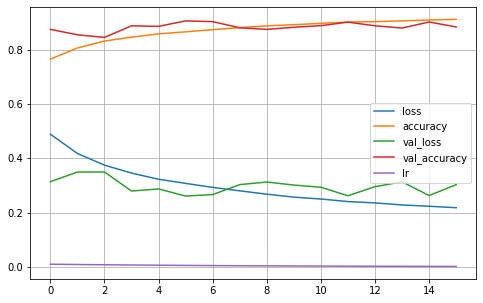

In [ ]:
input=keras.layers.Input(shape=(14,))
hidden1 = keras.layers.Dense(125,activation = 'relu', kernel_initializer='he_normal')(input)
output = keras.layers.Dense(1, activation="sigmoid")(hidden1)
model1 = keras.Model(inputs=[input],outputs=[output])

model1.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])
model1.summary()

history = model1.fit(X_train_DA, y_train_DA, callbacks=[early_stopping_cb,lr_scheduler], validation_data=(X_valid, y_valid),  epochs=100, batch_size= 32, verbose=1)
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True)

In [ ]:
#model1.save('model1.h5') # saving the model

### Fitting the best model to the data with class weights

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 14)]              0         
_________________________________________________________________
dense_4 (Dense)              (None, 125)               1875      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 126       
Total params: 2,001
Trainable params: 2,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
825/825 [==============================] - 2s 2ms/step - loss: 0.0923 - accuracy: 0.7890 - val_loss: 0.4637 - val_accuracy: 0.7915
Epoch 2/100
825/825 [==============================] - 2s 2ms/step - loss: 0.0804 - accuracy: 0.8294 - val_loss: 0.4060 - val_accuracy: 0.8311
Epoch 3/100
825/825 [==============================] - 2s 2ms/step - loss: 0.0758 - accuracy: 0.8459 

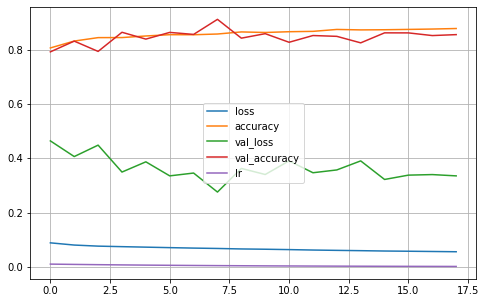

In [ ]:
input=keras.layers.Input(shape=(14,))
hidden1 = keras.layers.Dense(125,activation = 'relu', kernel_initializer='he_normal')(input)
output = keras.layers.Dense(1, activation="sigmoid")(hidden1)
model2 = keras.Model(inputs=[input],outputs=[output])

model2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])
model2.summary()

history1 = model2.fit(X_train, y_train, callbacks=[early_stopping_cb,lr_scheduler], validation_data=(X_valid, y_valid),  epochs=100, batch_size= 32, verbose=1,class_weight=class_weights)
pd.DataFrame(history1.history).plot(figsize=(8, 5)) 
plt.grid(True)

In [ ]:
#model2.save('model2.h5') # saving the model

# Dense deep neural network

### Grid Search

In [ ]:
def dense_deep(nl,nn):
  optimizer = keras.optimizers.Adam(lr = 0.001)
  
  model = keras.models.Sequential()
  model.add(keras.layers.Input(shape=(14,)))
  # Add as many hidden layers as specified in nl
  for i in range(nl):
# Layers have nn neurons
    model.add(Dense(nn, activation='relu'))

  model.add(Dense(1, activation = 'sigmoid'))
  
  model.compile(optimizer=optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
  return model

In [ ]:
#30 minutes to run

# Define parameters
params = {'nn': [30,35,40,45,50,75,100,125,150,175,200,250,300,350,400],'nl':[3,4,5]}  
# Create a KerasClassifier
model = KerasClassifier(build_fn = dense_deep)

grid_search = GridSearchCV(model, param_grid = params, cv=10,scoring = 'accuracy')


result = grid_search.fit(X_train_DA,y_train_DA, validation_data=(X_valid, y_valid), callbacks=[early_stopping_cb,lr_scheduler],verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
print("Best:",result.best_score_,grid_search.best_params_)

Best: 0.775196335078534 {'nl': 4, 'nn': 125}


### Fitting the model to the data augmentation data

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 14)]              0         
_________________________________________________________________
dense_6 (Dense)              (None, 125)               1875      
_________________________________________________________________
dropout (Dropout)            (None, 125)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 125)               15750     
_________________________________________________________________
dropout_1 (Dropout)          (None, 125)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 125)               15750     
_________________________________________________________________
dropout_2 (Dropout)          (None, 125)               0   

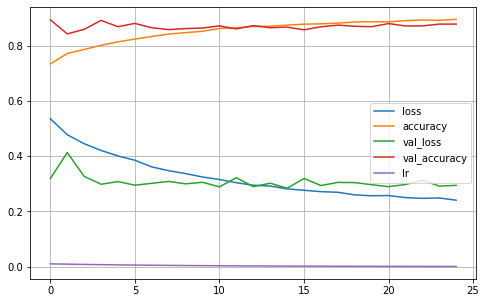

In [ ]:
input=keras.layers.Input(shape=(14,))
hidden1 = keras.layers.Dense(125,activation = 'relu',kernel_initializer='he_normal')(input)
hidden1drop = keras.layers.Dropout(rate=0.2)(hidden1)
hidden2 = keras.layers.Dense(125,activation = 'relu',kernel_initializer='he_normal')(hidden1drop)
hidden2drop = keras.layers.Dropout(rate=0.2)(hidden2)
hidden3 = keras.layers.Dense(125,activation = 'relu',kernel_initializer='he_normal')(hidden2drop)
hidden3drop = keras.layers.Dropout(rate=0.2)(hidden3)
hidden4 = keras.layers.Dense(125,activation = 'relu',kernel_initializer='he_normal')(hidden3drop)
hidden4drop = keras.layers.Dropout(rate=0.2)(hidden4)
output = keras.layers.Dense(1, activation="sigmoid")(hidden4drop)
dense_deep = keras.Model(inputs=[input],outputs=[output])

dense_deep.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])
dense_deep.summary()

hist_dense = dense_deep.fit(X_train_DA, y_train_DA, callbacks=[early_stopping_cb,lr_scheduler], validation_data=(X_valid, y_valid),  epochs=30, batch_size= 32, verbose=1)
pd.DataFrame(hist_dense.history).plot(figsize=(8, 5)) 
plt.grid(True)

In [ ]:
#dense_deep.save('dense_deep.h5') # saving the model

### Fitting the model to the data with class weights

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 14)]              0         
_________________________________________________________________
dense_11 (Dense)             (None, 125)               1875      
_________________________________________________________________
dropout_4 (Dropout)          (None, 125)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 125)               15750     
_________________________________________________________________
dropout_5 (Dropout)          (None, 125)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 125)               15750     
_________________________________________________________________
dropout_6 (Dropout)          (None, 125)               0   

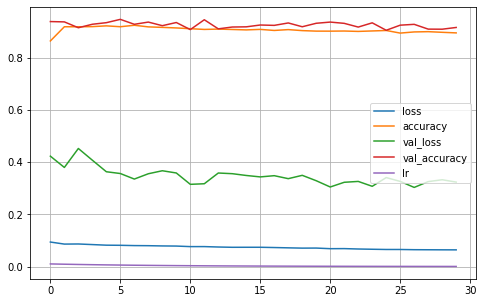

In [ ]:
input=keras.layers.Input(shape=(14,))
hidden1 = keras.layers.Dense(125,activation = 'relu',kernel_initializer='he_normal')(input)
hidden1drop = keras.layers.Dropout(rate=0.2)(hidden1)
hidden2 = keras.layers.Dense(125,activation = 'relu',kernel_initializer='he_normal')(hidden1drop)
hidden2drop = keras.layers.Dropout(rate=0.2)(hidden2)
hidden3 = keras.layers.Dense(125,activation = 'relu',kernel_initializer='he_normal')(hidden2drop)
hidden3drop = keras.layers.Dropout(rate=0.2)(hidden3)
hidden4 = keras.layers.Dense(125,activation = 'relu',kernel_initializer='he_normal')(hidden3drop)
hidden4drop = keras.layers.Dropout(rate=0.2)(hidden4)
output = keras.layers.Dense(1, activation="sigmoid")(hidden4drop)
dense_deep1 = keras.Model(inputs=[input],outputs=[output])

dense_deep1.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])
dense_deep1.summary()

hist_dense1 = dense_deep1.fit(X_train, y_train, callbacks=[early_stopping_cb,lr_scheduler], validation_data=(X_valid, y_valid),  epochs=30, batch_size= 32, verbose=1,class_weight=class_weights)
pd.DataFrame(hist_dense1.history).plot(figsize=(8, 5)) 
plt.grid(True)

In [ ]:
#dense_deep1.save('dense_deep1.h5') # saving the model

# Wide and Deep Neural network

### Fitting the model to the data augmentation data

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 14)]         0                                            
__________________________________________________________________________________________________
dense_20 (Dense)                (None, 50)           750         input_7[0][0]                    
__________________________________________________________________________________________________
dense_21 (Dense)                (None, 50)           2550        dense_20[0][0]                   
__________________________________________________________________________________________________
dense_22 (Dense)                (None, 50)           2550        dense_21[0][0]                   
____________________________________________________________________________________________

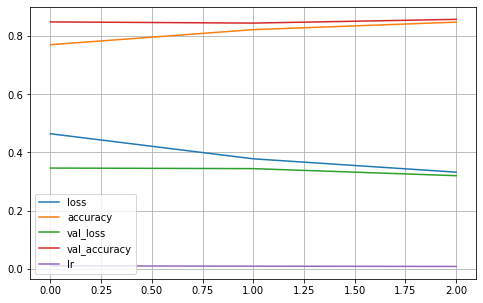

In [ ]:
input_ = keras.layers.Input(shape=(14,))
hidden1 = keras.layers.Dense(50, activation="relu",kernel_initializer='he_normal')(input_)
hidden2 = keras.layers.Dense(50, activation="relu",kernel_initializer='he_normal')(hidden1)
hidden3 = keras.layers.Dense(50, activation="relu",kernel_initializer='he_normal')(hidden2)
concat = keras.layers.Concatenate()([input_,hidden3])
output = keras.layers.Dense(1,activation="sigmoid")(concat)
wide_deep = keras.Model(inputs=[input_], outputs=[output])

wide_deep.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])
wide_deep.summary()

hist_wide_deep = wide_deep.fit(X_train_DA, y_train_DA, callbacks=[early_stopping_cb,lr_scheduler], validation_data=(X_valid, y_valid),  epochs=3, batch_size= 32, verbose=1)
pd.DataFrame(hist_wide_deep.history).plot(figsize=(8, 5)) 
plt.grid(True)

In [ ]:
wide_deep.save('wide_deep.h5')

### Fitting the model to the data with class weights

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 14)]         0                                            
__________________________________________________________________________________________________
dense_24 (Dense)                (None, 50)           750         input_8[0][0]                    
__________________________________________________________________________________________________
dense_25 (Dense)                (None, 50)           2550        dense_24[0][0]                   
__________________________________________________________________________________________________
dense_26 (Dense)                (None, 50)           2550        dense_25[0][0]                   
____________________________________________________________________________________________

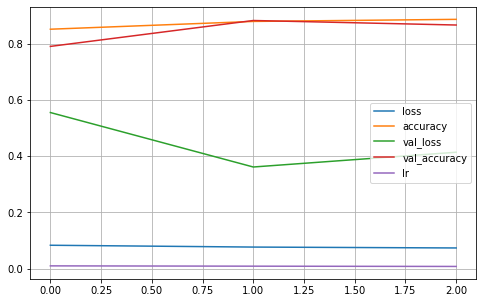

In [ ]:
input_ = keras.layers.Input(shape=(14,))
hidden1 = keras.layers.Dense(50, activation="relu",kernel_initializer='he_normal')(input_)
hidden2 = keras.layers.Dense(50, activation="relu",kernel_initializer='he_normal')(hidden1)
hidden3 = keras.layers.Dense(50, activation="relu",kernel_initializer='he_normal')(hidden2)
concat = keras.layers.Concatenate()([input_,hidden3])
output = keras.layers.Dense(1,activation="sigmoid")(concat)
wide_deep1 = keras.Model(inputs=[input_], outputs=[output])

wide_deep1.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])
wide_deep1.summary()

hist_wide_deep1 = wide_deep1.fit(X_train, y_train, callbacks=[early_stopping_cb,lr_scheduler], validation_data=(X_valid, y_valid),  epochs=3, batch_size= 32, verbose=1,class_weight=class_weights)
pd.DataFrame(hist_wide_deep1.history).plot(figsize=(8, 5)) 
plt.grid(True)

In [ ]:
#wide_deep1.save('wide_deep1.h5')

# Results

In [ ]:
# Predicting on the validation set
valid_pred_wide1 = wide_deep1.predict(X_valid).round()
valid_pred_wide = wide_deep.predict(X_valid).round()
valid_pred_dense1 = dense_deep1.predict(X_valid).round()
valid_pred_dense = dense_deep.predict(X_valid).round()
valid_pred_model1 = model1.predict(X_valid).round()
valid_pred_model2 = model2.predict(X_valid).round()
valid_pred = log_clf.predict(X_valid).round()
valid_pred_DA = log_clf_DA.predict(X_valid).round()

In [ ]:
# F1 scores for each model
f1_wide1 = f1_score(y_valid, valid_pred_wide1)
f1_wide = f1_score(y_valid, valid_pred_wide)
f1_dense1 = f1_score(y_valid, valid_pred_dense1)
f1_dense = f1_score(y_valid, valid_pred_dense)
f1_model1 = f1_score(y_valid, valid_pred_model1)
f1_model2 = f1_score(y_valid, valid_pred_model2)
f1_clf = f1_score(y_valid,valid_pred)
f1_clf_DA = f1_score(y_valid,valid_pred_DA)

f1_scores = [f1_clf,f1_clf_DA,f1_model2,f1_model1, f1_dense1,f1_dense,f1_wide1,f1_wide]


In [ ]:
results = pd.DataFrame((f1_scores), index = ['Logistic', 'Logistic with DA', '3-layer', '3-layer with DA', 'Dense deep', 'Dense deep with DA','Wide and Deep','Wide and Deep with DA'])
results['F1'] = results[0]
results = results[['F1']]

In [ ]:
loss_hist_wide_deep = hist_wide_deep.history['loss'][-1]
valacc_hist_wide_deep = hist_wide_deep.history['val_accuracy'][-1]
valloss_hist_wide_deep = hist_wide_deep.history[ 'val_loss'][-1]
acc_hist_wide_deep = hist_wide_deep.history['accuracy'][-1]

loss_hist_wide_deep1 = hist_wide_deep1.history['loss'][-1]
valacc_hist_wide_deep1 = hist_wide_deep1.history['val_accuracy'][-1]
valloss_hist_wide_deep1 = hist_wide_deep1.history[ 'val_loss'][-1]
acc_hist_wide_deep1 = hist_wide_deep1.history['accuracy'][-1]

loss_hist_dense_deep = hist_dense.history['loss'][-1]
valacc_hist_dense_deep = hist_dense.history['val_accuracy'][-1]
valloss_hist_dense_deep = hist_dense.history[ 'val_loss'][-1]
acc_hist_dense_deep = hist_dense.history['accuracy'][-1]

loss_hist_dense_deep1 = hist_dense1.history['loss'][-1]
valacc_hist_dense_deep1 = hist_dense1.history['val_accuracy'][-1]
valloss_hist_dense_deep1 = hist_dense1.history[ 'val_loss'][-1]
acc_hist_dense_deep1 = hist_dense1.history['accuracy'][-1]

loss_hist_model1 = history.history['loss'][-1]
valacc_hist_model1 = history.history['val_accuracy'][-1]
valloss_hist_model1 = history.history[ 'val_loss'][-1]
acc_hist_model1 = history.history['accuracy'][-1]

loss_hist_model2 = history1.history['loss'][-1]
valacc_hist_model2 = history1.history['val_accuracy'][-1]
valloss_hist_model2 = history1.history[ 'val_loss'][-1]
acc_hist_model2 = history1.history['accuracy'][-1]

In [ ]:
logistic_acc = accuracy_score(y_valid,valid_pred)
logistic_acc_DA = accuracy_score(y_valid,valid_pred_DA)

In [ ]:
# Creating results table
results['Kaggle'] = [0.08701,0.08304,0.13149,0.10729,0.05020,0.08485,0.12260,0.09895]
results['Loss'] = ['0','0',loss_hist_model2 ,loss_hist_model1,loss_hist_dense_deep1,loss_hist_dense_deep,loss_hist_wide_deep1,loss_hist_wide_deep]
results['Accuracy'] = [logistic_acc,logistic_acc_DA,acc_hist_model2,acc_hist_model1,acc_hist_dense_deep1,acc_hist_dense_deep,acc_hist_wide_deep1,acc_hist_wide_deep]
results['val loss'] = ['0','0',valloss_hist_model2,valloss_hist_model1,valloss_hist_dense_deep1,valloss_hist_dense_deep,valloss_hist_wide_deep1,valloss_hist_wide_deep]
results['val accuracy'] = ['0','0',valacc_hist_model2,valacc_hist_model1,valacc_hist_dense_deep1,valacc_hist_dense_deep,valacc_hist_wide_deep1,valacc_hist_wide_deep]

In [ ]:
results

,F1,Kaggle,Loss,Accuracy,val loss,val accuracy
Logistic,0.217709,0.08701,0,0.854091,0,0
Logistic with DA,0.214627,0.08304,0,0.825909,0,0
3-layer,0.360262,0.13149,0.0555428,0.877462,0.334887,0.855
3-layer with DA,0.394966,0.10729,0.217918,0.910919,0.302811,0.882879
Dense deep,0.402151,0.05020,0.0638851,0.894962,0.3234,0.915758
Dense deep with DA,0.352854,0.08485,0.240673,0.895892,0.294431,0.878788
Wide and Deep,0.292605,0.12260,0.0736969,0.886818,0.414189,0.866667
Wide and Deep with DA,0.339437,0.09895,0.332244,0.848319,0.320116,0.857879


#Predicting on Kaggle

In [ ]:
# Tranforming the test set
y_test = test1.values
y_test_scaled = std_scaler.transform(y_test)
y_test_scaled

array([[-0.89638476, -0.65955109,  0.        , ...,  0.08045437,
        -1.21808947, -0.53836929],
       [-0.89638476, -0.44660603,  0.        , ...,  0.08045437,
        -1.16521906, -0.53836929],
       [-0.89638476, -0.48209687,  0.        , ...,  0.08045437,
        -1.21808947, -0.53836929],
       ...,
       [ 0.62279441, -0.09169759,  0.        , ..., -1.04263959,
        -1.03610799, -1.58856653],
       [ 0.62279441,  0.01477495,  1.        , ...,  0.08045437,
        -1.11656296, -0.53836929],
       [ 1.38238399,  0.33419254,  1.        , ...,  0.08045437,
        -1.10430316, -0.53836929]])

In [ ]:
# Predicting on the test set
y_pred_dense1 = dense_deep1.predict(y_test_scaled).round()
y_pred_wide1 = wide_deep1.predict(y_test_scaled).round()
y_pred_wide = wide_deep.predict(y_test_scaled).round()
y_pred_dense = dense_deep.predict(y_test_scaled).round()
y_pred_model1 = model1.predict(y_test_scaled).round()
y_pred_model2 = model2.predict(y_test_scaled).round()
y_pred = log_clf.predict(y_test_scaled).round()
y_pred_DA = log_clf_DA.predict(y_test_scaled).round()

In [ ]:
# Creating csv files to upload on Kaggle
file = ['y_pred_dense1', 'y_pred_wide', 'y_pred_dense', 'y_pred_model1', 'y_pred_model2','y_pred_wide1','y_pred','y_pred_DA']
results = [y_pred_dense1, y_pred_wide, y_pred_dense, y_pred_model1, y_pred_model2, y_pred_wide1,y_pred,y_pred_DA]

for x in range(len(results)):
    dataframe = pd.DataFrame(results[x])
    dataframe = dataframe.astype(int)
    dataframe ['Id'] = test['Id']
    dataframe ['psrel'] = dataframe[0]
    dataframe = dataframe[['Id', 'psrel']]
    dataframe.to_csv(f'{file[x]}_results.csv', index = False)

#Loading the saved models

In [ ]:
model1 = keras.models.load_model("model1.h5")
model2 = keras.models.load_model("model2.h5")
dense_deep = keras.models.load_model("dense_deep.h5")
dense_deep1 = keras.models.load_model("dense_deep1.h5")
wide_deep = keras.models.load_model("wide_deep.h5")
wide_deep1 = keras.models.load_model("wide_deep1.h5")
#works after you have run the notebook